## PHYS 105A:  Introduction to Scientific Computing

# The C programming language

Chi-kwan Chan

In [1]:
%%time
# %%time is a feature provided by iPython to measure the execution time
# of a cell. Python comes with a built-in module for that, timeit.


# What we did last time... how long does this piece of code take to run?

import random as rnd
from matplotlib import pyplot as plt

def randomwalk(n_steps=1000):
    X = [0] # initial position
    
    for t in range(n_steps):
        last = X[-1]            # last position
        r    = rnd.randint(0,1) # we generate 0 or 1 randomly
        if r == 0:              # depending on r, we step left or right
            curr = last + 1
        else:
            curr = last - 1    
        X.append(curr)          # append the current position to the list X
        
    return X                    # return the result

n_trials = 100
T = range(1, 1000+1)
D = []
for t in T:  # M = 0; M += m ...; M /= N  => mean of m
    M = 0
    for trial in range(n_trials):
        X  = randomwalk(t)
        M += abs(X[-1])
    M /= n_trials
    D.append(M)

CPU times: user 40.5 s, sys: 409 ms, total: 41 s
Wall time: 40.2 s


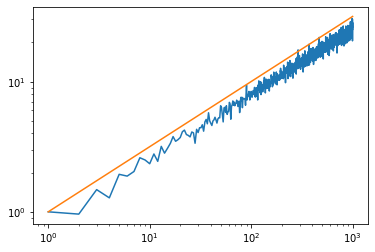

In [2]:
plt.loglog(T, D)
plt.plot(T, [t**0.5 for t in T]) # y = sqrt(x)

## Performance

* When we sovled the random walk and Brownian motion problems last time, or compute $\pi$ and try to study its convergnece rate, our computers didn't give us the answer immediate.

* This was a pretty simple problem... why did it take so long?

* One of the reasons is that we use python.

* Python, being an interpreted lagnauge, is slow in nature.

* Because one of the goals of this course is to see many many tools---so let us try to implement the same problem in a compiled langauge!

## Which Language to Choose?

* In the second lecture, we had a quick introduction to the Unix/Linux operating systems.  And we saw these two gentlemen: Ken Thompson and Dennis Ritchie.

* In those early day, one thing that made Unix stood out from its competitors was that it was developed in a "high level programming language" C.  Dennis Ritchie is actually the inventor of C.

* The popularity and power of Unix and C go hand-in-hand.

* Even C was invented in 1972 (50 years ago!), it is still the [*SECOND POPULAR* programming language](https://www.tiobe.com/tiobe-index/) today!

* It's very inferential and its syntax shows up in many modern laguages such as C++, Go, Rust, etc.

![Ken Thompson and Dennis Ritchie](https://upload.wikimedia.org/wikipedia/commons/1/1b/Ken_Thompson_and_Dennis_Ritchie--1973.jpg "Ken Thompson and Dennis Ritchie")

# The C Programming Language

![C](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQay_31fsabgktZbn76EtixolthTffPuHhTNMTX7782iZ9oJz8Z)

## Compiler

* First thing to know, C is a compiled language.  You need a *compiler* to use it.

* A compiler is a program that translate your program from human readable source codes into machine readable executables.

* On Unix/Linux/Mac, the most popular choices are `gcc` and `clang`.

* On Windows, you may use:
  * C/C++ for Visual Studio Code: https://code.visualstudio.com/docs/languages/cpp
  * Visual Studio Community Edition: https://visualstudio.microsoft.com/downloads/
  * Tiny C Compiler: https://bellard.org/tcc/
  * GCC: https://gcc.gnu.org/install/binaries.html
  * The Linux compilers in WSL

## Hello World in C

* The following is the text inside a plan text file with ".c" extension, e.g., "hw.c"

      #include <stdio.h> /* I/O is not built-in to the language; include standard library */
      int main()         /* a program always uses `main` as an entry point */
      {
        printf("Hello World!\n"); /* use "format-print" for output */
        return 0;                 /* the standard is to return 0 from main if no error */
      }
        
* Running "hw.c" does not work.  You need to first compile it:

      gcc hw.c -o hw.exe
      
  the above command would compile the "hw.c" program into the executable "hw.exe".  The ".exe" extension is optional on Unix/Linux.

* Now you can run the program by:

      ./hw.exe
  
  which outputs "Hello World!"

## Python vs C

Python                     | C
:--                        | :--
`import package`           | `#include <package.h>` and then link with `gcc ... -lpackage`
Dynamic type               | `int`, `double`, `char []`
`def func(): ...`          | `double func(double x) {...}`
Must use indentation       | Indentation optional; use `{...}` for block
New line for new statement | `;` to end a statement
`print(x)`                 | `printf("%d\n", x);`
`return x`                 | `return x;`
`if x == 1: ... else: ...` | `if (x == 1) {...} else {...}`
`for i in range(10): ...`  | `for (int i = 0; i < 10; ++i) {...}`
`/` vs `//` for divisions  | `/` behavior depends on type
`**` for power             | `#include <math.h>` and then use `pow(x, y)` for power; need to link with `gcc ... -lm`
`# ...` for comments       | `/* ... */` or `//...` for comments

* If we save the C code in "rw.c", we may compile it in a terminal
      gcc rw.c -o rw.exe
  or we can use the `make` program to run the `Makefile`:
      make

* We can now run it as
      ./rw.exe
      
* This will give us a long list of numbers.  We may "redirect" it to a text file.  We may also time it.
      time ./rw.exe > rw.txt
      
* We may even ask the compiler to work harder and optimize the code for us!
      gcc rw.c -O3 -o rw.exe

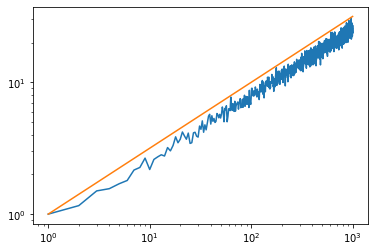

In [3]:
# Let's also plot the result

from matplotlib import pyplot as plt

T, D = [], []
with open('rw.txt', 'r') as f:
    for line in f:
        t, d = line.split()
        T.append(int(t))
        D.append(float(d))
        
plt.loglog(T, D)
plt.plot(T, [t**0.5 for t in T]) # y = sqrt(x)

* On my laptop:
  * The python code took 50 sec to compute this.
  * The C code took 0.25 sec to compute the same thing!
  
* The C code is 200x faster than our python code!!!

* Now imagine you have a scientific simulation that takes a week to run on C.  It will take four years to run if you use pure python!

* Know your problem; know your tools; and then decide what to use.

* We will learn how to do this fast in python next time.